Cleaning and preparation

In [5]:
import pandas as pd
import json

# Load the CSV file
file_path = '/Users/vishalsehgal/Documents/Masters/Data Forensics/DFProject-1/crawler/crawler/output/wallet_spider/wallets.csv'
wallets_df = pd.read_csv(file_path)

# Define a function to parse wallet addresses
def parse_wallet_addresses(wallet_addresses):
    try:
        return json.loads(wallet_addresses.replace("'", '"'))
    except json.JSONDecodeError:
        return {}

# Apply the parsing function to the wallet_addresses column
wallets_df['parsed_addresses'] = wallets_df['wallet_addresses'].apply(parse_wallet_addresses)

# Normalize the parsed addresses into separate columns
wallets_normalized_df = pd.json_normalize(wallets_df['parsed_addresses'])

# Concatenate the normalized addresses with the original dataframe
wallets_combined_df = pd.concat([wallets_df.drop('parsed_addresses', axis=1), wallets_normalized_df], axis=1)

# Display the combined dataframe
wallets_combined_df.head()


,url,wallet_addresses,BTC,BEP20,BECH32,Loop,KCC,Cash,ERC20,SOL,...,zkSync,Linea,OP,EOS,LTC,Monero,Neo,Ripple,Matic,Verge
0,https://www.playerup.com/middleman/payment/bit...,"{'BTC': '38KkqFTGE8ErAXrL3eE67XkfEvZBjyveqz', ...",38KkqFTGE8ErAXrL3eE67XkfEvZBjyveqz,0x041fedb4de9477e67c5212ed852c45a2ad57965c,bc1q9jfs46ksewkpeeraplkuym3tmgteq4nsfhaqmn,3QhMbCVX1kdYU3YVUBeJ77WqtsWd4SrFEE,0xd02785d8a3d4e8f5ac9087cd3616ace75ed78a2a,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.playerup.com/middleman/payment/bit...,{'Cash': 'qpm08ntfjru74cgsc6qf96yhj466t4ukmg3l...,NaN,NaN,NaN,NaN,NaN,qpm08ntfjru74cgsc6qf96yhj466t4ukmg3l82jty7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.playerup.com/middleman/payment/bin...,{'BEP20': '0xfe69c92ad05ce854029af0a26022d3608...,NaN,0xfe69c92ad05ce854029af0a26022d360830381cb,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.playerup.com/middleman/payment/usd...,{'ERC20': '0x799638e8b1a30c07445057f91b320439d...,NaN,0x44536f970385db0891d3d59179dfcb7f74896cc4,NaN,NaN,NaN,NaN,0x799638e8b1a30c07445057f91b320439d18a1a09,4rWCqZw2sjZQUAEz1msGdSHrp7Bdtz7M75bqtdVBmdt6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.playerup.com/middleman/payment/dog...,"{'DOGE': 'DLvE117snPsuXZuggPs82CNGzQZZBgvWdZ',...",NaN,0x041fedb4de9477e67c5212ed852c45a2ad57965c,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Count the occurrences of each wallet type
wallet_type_counts = wallets_combined_df.drop(['url', 'wallet_addresses'], axis=1).count()

# Display the summary
wallet_type_counts_df = wallet_type_counts.to_frame(name='Count')
wallet_type_counts_df


,Count
BTC,1
BEP20,8
BECH32,1
Loop,1
KCC,3
Cash,1
ERC20,6
SOL,3
TRC20,2
AVAX,2


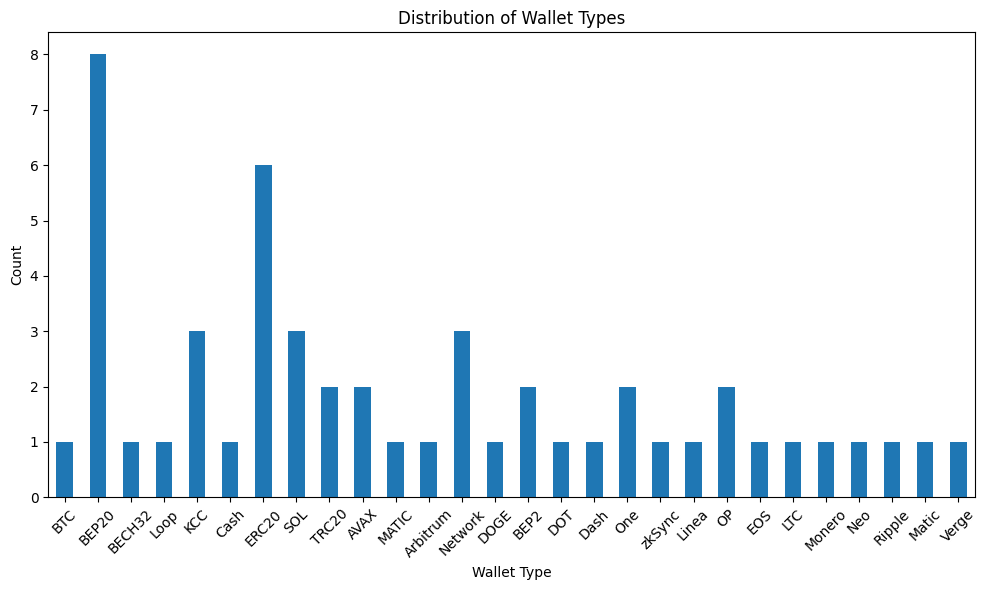

In [7]:
import matplotlib.pyplot as plt

# Plot the distribution of wallet types
plt.figure(figsize=(10, 6))
wallet_type_counts.plot(kind='bar')
plt.title('Distribution of Wallet Types')
plt.xlabel('Wallet Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Transaction Analysis

In [9]:
import requests

def get_etherscan_transactions(address, api_key):
    url = f"https://api.etherscan.io/api?module=account&action=txlist&address={address}&startblock=0&endblock=99999999&sort=asc&apikey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Example usage (replace 'YOUR_API_KEY' with an actual Etherscan API key)
api_key = 'DMY3T9QQP87HIWS29EAFWMW6RVYPZYIHRG'
eth_address = '0x799638e8b1a30c07445057f91b320439d18a1a09'
eth_transactions = get_etherscan_transactions(eth_address, api_key)

# Display a sample of the fetched transactions
if eth_transactions and eth_transactions['status'] == '1':
    transactions_df = pd.DataFrame(eth_transactions['result'])
    print(transactions_df.head())
else:
    print("Failed to fetch transactions or no transactions found.")


  blockNumber   timeStamp                                               hash  \
0    12710962  1624728250  0x28819db96ef15a21633b1ce8cd8aa20d61ed6a57921d...   
1    12722561  1624883752  0x58eca81eec579d66ee3ffebcf91b97dbe860aeb15741...   
2    12725892  1624927939  0x72b99e32bc7ce02dca1ae5288312587fcadf7f3978ee...   
3    12746583  1625207189  0x3fef8b862aa96925141aa6cefc36738533250e5bb430...   
4    12865593  1626813512  0xec7a84593ef9e8eefbcb6448b707dbd24ac26bae84fc...   

  nonce                                          blockHash transactionIndex  \
0     0  0x85b1fe8c3c89df051aed17e04049f3d812ec3f890bf8...              136   
1     1  0x0a289f231ff889e06f953183d53ce513a367ce9fda3a...              231   
2     2  0x7ce81bfe89b5c2e5b7073c9b249584243aab99a37551...              234   
3     3  0x8f04063aa53abcd330dd351341971ba0aa0df489d1c8...               24   
4     4  0x598e5c1c9891754889df2c60cdb4dfc49436ba1bdfa8...              260   

                                         fro